# 1.1: Introduction to Inverse Problems - Simple Regression#

*Andrew Valentine & Malcolm Sambridge - Research School of Earth Sciences, The Australian National University - Last updated Sept. 2019*

This aim of this exercise is to explore some of the factors which affect inverse problems and their solutions. It is also an opportunity to refresh your memory about Python and get used to the Jupyter Notebook format if you haven't used it before.

Each Jupyter Notebook is made up of a number of 'cells'. A cell can either be text or Python code. To edit a cell, click on it (double-click in the case of text). Once you've finished editing, hold down the Shift key and press Enter. This will execute the code (if a code cell), or render it nicely (if a text cell). Text cells are rendered using Markdown. This allows you to format text and use LaTeX-style commands to typeset mathematical formulae. Google will help you find more details about Markdown syntax (for example, [this site](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) provides a useful quick reference guide).  To change the type of a cell, select it and then click on Cell > Cell Type in the menu at the top. You can also press Esc (to enter 'Command Mode') and then press M (for Markdown) or Y (for Code).

As you work through these practicals, make use of the Jupyter Notebook format to keep a record of what you have tried, and what you have discovered.

As in every Python program, we need to begin by loading some libraries. For Jupyter we also need the `%matplotlib inline` command, which ensures that figures are rendered properly within the Notebook. This could be omitted if you wanted to reproduce this practical as a 'standard' Python program.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from inversionCourse import curveFitting

This practical focusses on regression - that is, fitting curves to datasets. The module `inversionCourse.curveFitting` provides two functions, `curveFittingFwd` and `curveFittingInv`, which implement the forward and inverse problems respectively.

To begin with, we will work with polynomial curves, $$y(x) = \sum_{n=0}^N m_n x^n\,.$$
Here, $N$ is the 'order' of the polynomial: if N=1 we have a straight line, if N=2 it will be a quadratic, and so on. The $m_n$ are the 'model coefficients'.

The function `curveFitting.curveFittingFwd` computes $y(x)$ for any vector of model coefficients. The syntax is 
```python
y = curveFitting.curveFittingFwd(model,x)
```
where `model` is a NumPy array of coefficients $(m_0,m_1,\ldots,m_N)$, and where `x` is either a single point, or a NumPy array containing many points at which the function should be evaluated. The returned value, `y`, will be a single value or array to match `x`. Note that you do not need to explicitly specify the order of polynomial desired: the function will determine this automatically from the number of model coefficients supplied.

Here's an example of `curveFittingFwd` in action. We generate some random samples from $y=5x^2+2x+3$, add Gaussian random noise to them, and plot them. We also plot the curve itself.

Text(0, 0.5, 'y')

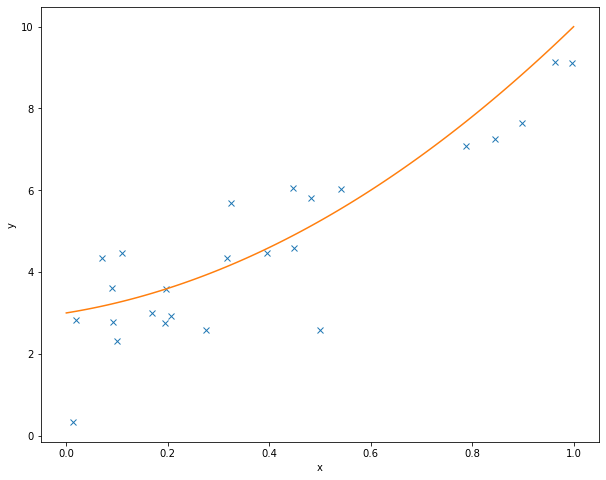

In [2]:
modelInput=np.array([3,2,5])
npts = 25
xpts = np.random.uniform(0,1,npts)
ypts = curveFitting.curveFittingFwd(modelInput,xpts) + np.random.normal(0,1,size=npts)
plt.figure(figsize=(10,8))
plt.plot(xpts,ypts,'x')
plt.plot(np.linspace(0,1,100),curveFitting.curveFittingFwd(modelInput,np.linspace(0,1,100)))
plt.xlabel('x')
plt.ylabel('y')

**Task 1:** Satisfy yourself that you understand how the above figure is generated, and what each of the different Python functions does. Remember, you can type `name?` and hit Shift-Enter to get help about object `name`. Can you make a similar figure for the function $y = 15 x^3-8x+3$?

In [3]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



The function `curveFitting.curveFittingInv` implements the inverse problem, estimating the coefficients $m_n$ given a dataset of $(x_i,y_i)$ pairs. Soon, we will learn *how* this is done, but for now it can be treated as a 'black box'. Its syntax is
```python
m = curveFitting.curveFittingInv(x,y,nparam)
```
where `x` and `y` are NumPy arrays containing the dataset, and where `nparam` is the number of model parameters we wish to recover (i.e. $N+1$ where $N$ is the polynomial order). The returned value, `m`, is a NumPy array of lenghth `nparam` containing the best-fitting coefficients.

Let's try fitting a curve to the dataset we made earlier. We perform the inversion, and then generate a curve using the results.

Recovered model coefficients: [2.46564054 4.38337752 2.06106675]
Input model coefficients: [3 2 5]


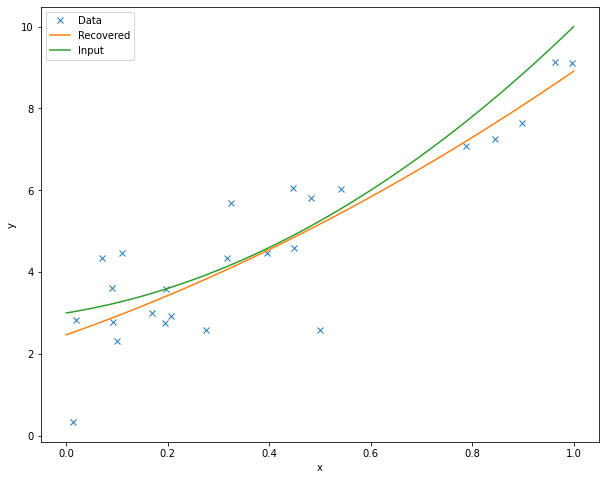

In [4]:
order = 2
model = curveFitting.curveFittingInv(xpts,ypts,order+1)
print ("Recovered model coefficients:", model)
print ("Input model coefficients:", modelInput)
plt.figure(figsize=(10,8))
plt.plot(xpts,ypts,'x',label='Data')
plt.plot(np.linspace(0,1,100),curveFitting.curveFittingFwd(model,np.linspace(0,1,100)),label='Recovered')
plt.plot(np.linspace(0,1,100),curveFitting.curveFittingFwd(modelInput,np.linspace(0,1,100)),label='Input')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**Task 2:** Is the recovered model a good fit to the data? Do the recovered model coefficients agree well with the input coefficients? How is performance affected by:
- The number of data points?
- The polynomial order of the input model?
- The polynomial order of the model sought (try inverting for a model of different polynomial order from that used to generate the data)?
- The noise level?


In [5]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



Of course, not all functions are polynomials. Other common forms include:

- Fourier series: $y(x) = \frac{m_0}{2}+\sum_{n=1}^N \left\{m_{2n-1} \sin\left(\frac{2n \pi x}{L}\right)+m_{2n} \cos\left(\frac{2n\pi x}{L}\right)\right\}$

- Discretised functions: $y(x)=m_n$ where $\frac{nL}{N+1}\le x\le\frac{(n+1)L}{N+1}$ and $n=0\ldots N$

In both cases, we have introduced a quantity `L` which represents the length of the domain, i.e. we are restricting ourselves to $x$-values satisfying $0\le x \le L$. Note that the Fourier model is specified by a total of $(2N+1)$ parameters; the discrete model has $(N+1)$ parameters.

The functions `curveFitting.curveFittingFwd` and `curveFitting.curveFittingInv` can handle both of these if we provide an additional argument, `basis='fourier'` or `basis='discrete'`, when calling the function. (The default case corresponds to `basis='polynomial'`.) We assume that $L=1$, although this can be changed via the optional argument `domainLength=L`.

Let's see how it works.

Recovered model coefficients: [-0.20993592  1.25419602  0.611673   -0.36018744  0.87257403  1.33017182
 -0.68088748]
Input model coefficients: [ 1.   0.3  0.2  0.   0.6  1.3 -0.3]


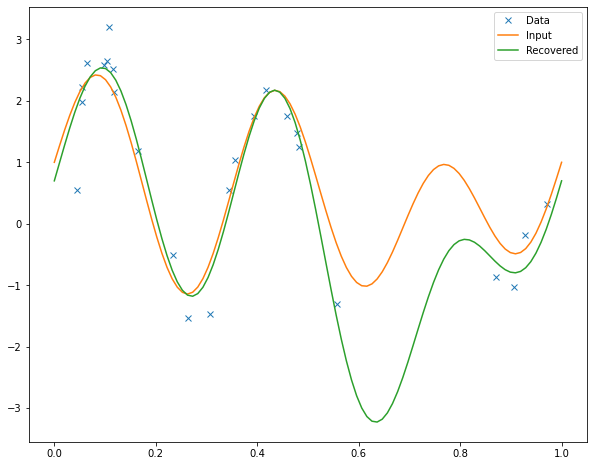

In [6]:
modelInput = np.array([1,0.3,0.2,0.,0.6,1.3,-0.3])
inputBasis='fourier'
npts = 25
xpts = np.random.uniform(0,1,size=npts)
ypts = curveFitting.curveFittingFwd(modelInput,xpts,basis=inputBasis)+np.random.normal(0.,0.5,size=npts)
plt.figure(figsize=(10,8))
plt.plot(xpts,ypts,'x',label='Data')
plt.plot(np.linspace(0,1,100),curveFitting.curveFittingFwd(modelInput,np.linspace(0,1,100),basis=inputBasis)
        ,label='Input')
nparam = 7
inversionBasis='fourier'
model = curveFitting.curveFittingInv(xpts,ypts,nparam,basis=inversionBasis)
print ("Recovered model coefficients:", model)
print ("Input model coefficients:", modelInput)
plt.plot(np.linspace(0,1,100),curveFitting.curveFittingFwd(model,np.linspace(0,1,100),basis=inversionBasis)
         ,label='Recovered')
plt.legend()

**Task 3:** Explore performance with the different types of functions. Some things to think about:
- What happens if you use the 'discrete' type instead of the 'fourier' type?
- What sorts of datasets are suited to inversion using each type?
- What happens if you generate a dataset using one type, and then invert it using a different type?
- What happens if you solve for a model with more (or fewer) parameters than the input model?
- How are results affected if you change the number of data points, or the noise level on those data points?

In [7]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



All of the different families of models share the same general form, $$y(x) = \sum_{n=0}^N m_n \phi_n(x)$$ where $\phi_n(x)$ is the n-th 'basis function'. Normally, all $(N+1)$ basis functions belong to a single 'family'. It is often instructive to visualise the individual basis vectors that are used to build the model. For example,

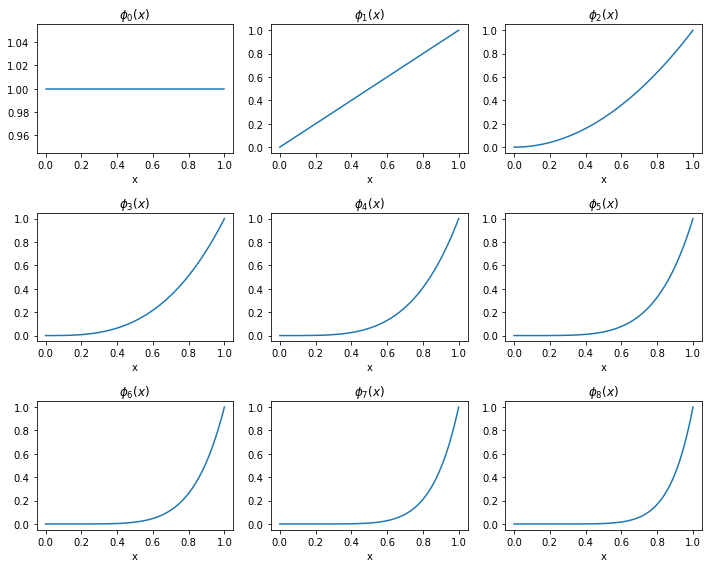

In [8]:
basis='polynomial'
nx=3
ny=3
plt.figure(figsize=(10,8))
for i in range(nx*ny):
    plt.subplot(ny,nx,i+1)
    model = np.zeros([nx*ny])
    model[i] = 1
    plt.plot(np.linspace(0,1,100),curveFitting.curveFittingFwd(model,np.linspace(0,1,100),basis=basis))
    plt.title(u'$\phi_{%i}(x)$'%i)
    plt.xlabel('x')
plt.tight_layout()

**Task 4:** Can you write down expressions for each basis function? For example, it is apparent that $\phi_0(x)=1$. What is $\phi_n(x)$? What do the basis functions for the other families look like? What is their functional form?

In [9]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



So far, we have considered examples where we have good data coverage - our $x$-samples are uniformly distributed across the entire $x$-range we are interested in. However, this is often not the case.

**Task 5:** Investigate what happens if there is 'missing data'.

To generate sample points, you might do something like this:
```python
xpts = np.zeros([25])
xpts[0:10] = np.random.uniform(0,0.2,size=10)
xpts[10:25] = np.random.uniform(0.6,1,size=15)
```
Does it make any difference if the missing data is in the middle of the range, compared to at one edge?

In [10]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

